# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\hp\anaconda3\python.exe -m pip install -U pip


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      C:\Users\hp\AppData\Local\Temp\pip-install-jgo8mffp\bokeh_951eb33afd404cbebe50873c9bdfb700\versioneer.py:416: SyntaxWarning: invalid escape sequence '\s'
        LONG_VERSION_PY['git'] = '''
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\hp\AppData\Local\Temp\pip-install-jgo8mffp\bokeh_951eb33afd404cbebe50873c9bdfb700\setup.py", line 118, in <module>
          version=get_version(),
                  ^^^^^^^^^^^^^
        File "C:\Users\hp\AppData\Local\Temp\pip-install-jgo8mffp\bokeh_951eb33afd404cbebe50873c9bdfb700\_setup_support.py", line 243, in get_version
          return versioneer.get_version()
                 ^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\hp\AppData\Local\Temp\pip-install-jgo8mffp\bokeh_951eb33

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
#!mkdir -p /root/.kaggle
#!touch /root/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "user_name"
kaggle_key = "api_key"

# Save API token the kaggle.json file
with open("kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [31]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('bike-sharing-demand/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [34]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('bike-sharing-demand/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [35]:
test.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


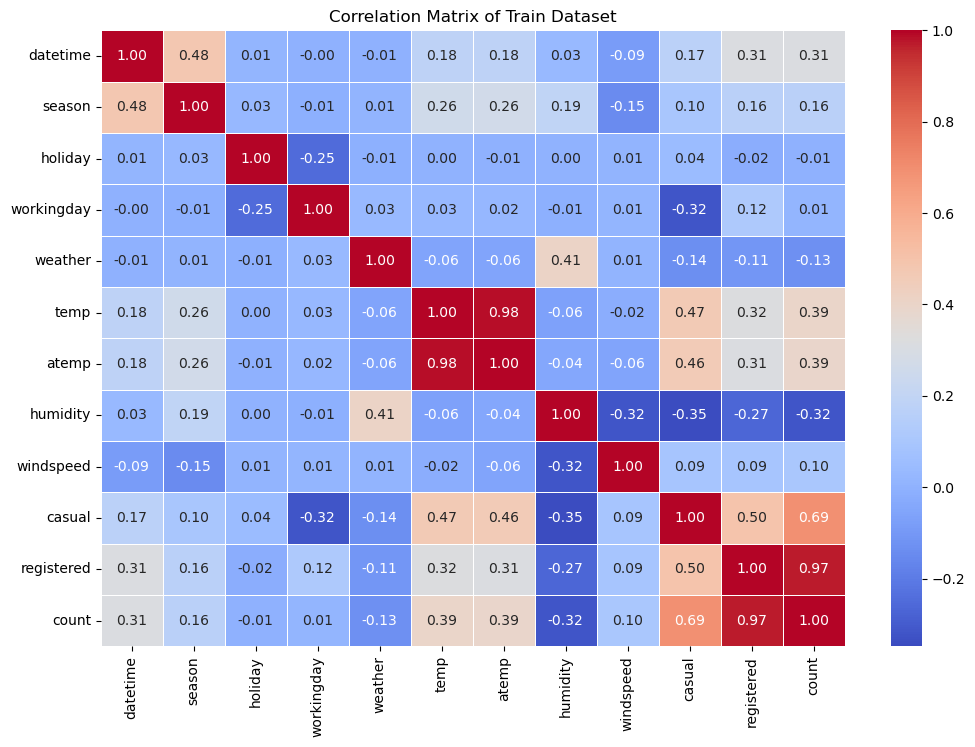

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Train Dataset")
plt.show()


In [38]:
# Same thing as train and test dataset
submission = pd.read_csv('bike-sharing-demand/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [39]:
print(train.columns)
train = train.drop(columns=['casual', 'registered'])
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [40]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20250526_081042"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       1.00 GB / 7.68 GB (13.0%)
Disk Space Avail:   56.19 GB / 271.14 GB (20.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout 

### Review AutoGluon's training run with ranking of models that did the best.

In [41]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.073323  root_mean_squared_error       4.380314  353.431991                0.005382           0.049131            3       True         14
1   RandomForestMSE_BAG_L2  -53.497870  root_mean_squared_error       3.950109  276.354074                0.437733           7.681310            2       True         12
2          LightGBM_BAG_L2  -54.885531  root_mean_squared_error       3.851194  280.791706                0.338818          12.118942            2       True         11
3          CatBoost_BAG_L2  -55.599670  root_mean_squared_error       3.598382  333.582609                0.086005          64.909845            2       True         13
4        LightGBMXT_BAG_L2  -60.958890  root_mean_squared_error       9.929090  292.831659   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'LightGBMXT_BAG_L1': -178.751832961977,
  'LightGBM_BAG_L1': -137.8756075550602,
  'RandomForestMSE_BAG_L1': -116.548

Best Performing Model: WeightedEnsemble_L3
Best Performing Score (absolute RMSE): 53.073323462063605


<Figure size 1000x600 with 0 Axes>

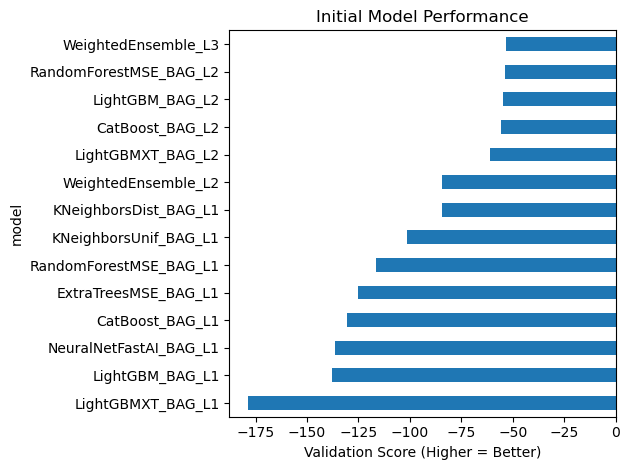

In [42]:
# Leaderboard and best score
leaderboard_initial = predictor.leaderboard(silent=True)

# Best model is the one with the highest (least negative) score_val
best_model_row = leaderboard_initial.loc[leaderboard_initial['score_val'].idxmax()]
best_model_initial = best_model_row['model']
best_score_initial = abs(best_model_row['score_val'])  #absolute RMSE

print("Best Performing Model:", best_model_initial)
print("Best Performing Score (absolute RMSE):", best_score_initial)

plt.figure(figsize=(10, 6))
leaderboard_initial_sorted = leaderboard_initial.sort_values("score_val", ascending=False)
leaderboard_initial_sorted.plot.barh(x="model", y="score_val", legend=False)
plt.xlabel("Validation Score (Higher = Better)")
plt.title("Initial Model Performance")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

### Create predictions from test dataset

In [43]:
predictions = predictor.predict(test)
predictions.head()

0    23.784376
1    42.105812
2    47.034081
3    50.254803
4    52.441776
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [44]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.435074
std        89.684669
min         2.895663
25%        19.567232
50%        64.194489
75%       165.567932
max       360.716400
Name: count, dtype: float64

In [45]:
# How many negative values do we have?
count_negative = (predictions < 0).sum()
print(count_negative)

0


In [46]:
# Set them to zero
predictions.loc[predictions < 0] = 0

In [47]:
print(predictions)

0        23.784376
1        42.105812
2        47.034081
3        50.254803
4        52.441776
           ...    
6488    157.233322
6489    157.233322
6490    155.025726
6491    151.223480
6492    149.277710
Name: count, Length: 6493, dtype: float32


### Set predictions to submission dataframe, save, and submit

In [48]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [49]:
!pip install kaggle

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
100%|██████████| 195k/195k [00:01<00:00, 113kB/s]


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [39]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
!kaggle competitions submissions -c bike-sharing-demand | more

2025-05-26 14:08:11,661	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-05-26 14:08:11,661	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-05-26 14:08:11,680	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-05-26 14:08:11,684	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2025-05-26 14:08:11,708	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UN

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-26 08:38:08.033000  first raw submission                      SubmissionStatus.COMPLETE  1.79315      1.79315       
submission_new_features.csv  2025-05-26 07:21:23.640000  new features                              SubmissionStatus.COMPLETE  0.66084      0.66084       
submission.csv               2025-05-26 07:06:57.633000  first raw submission                      SubmissionStatus.COMPLETE  1.62230      1.62230       
submission_new_hpo.csv       2025-05-25 15:55:35.483000  new features                              SubmissionStatus.COMPLETE  0.53605      0.53605       
submission_new_hpo.csv       2025-05-25 15:42:04.543000  new features       

#### Initial score of `1.79315`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

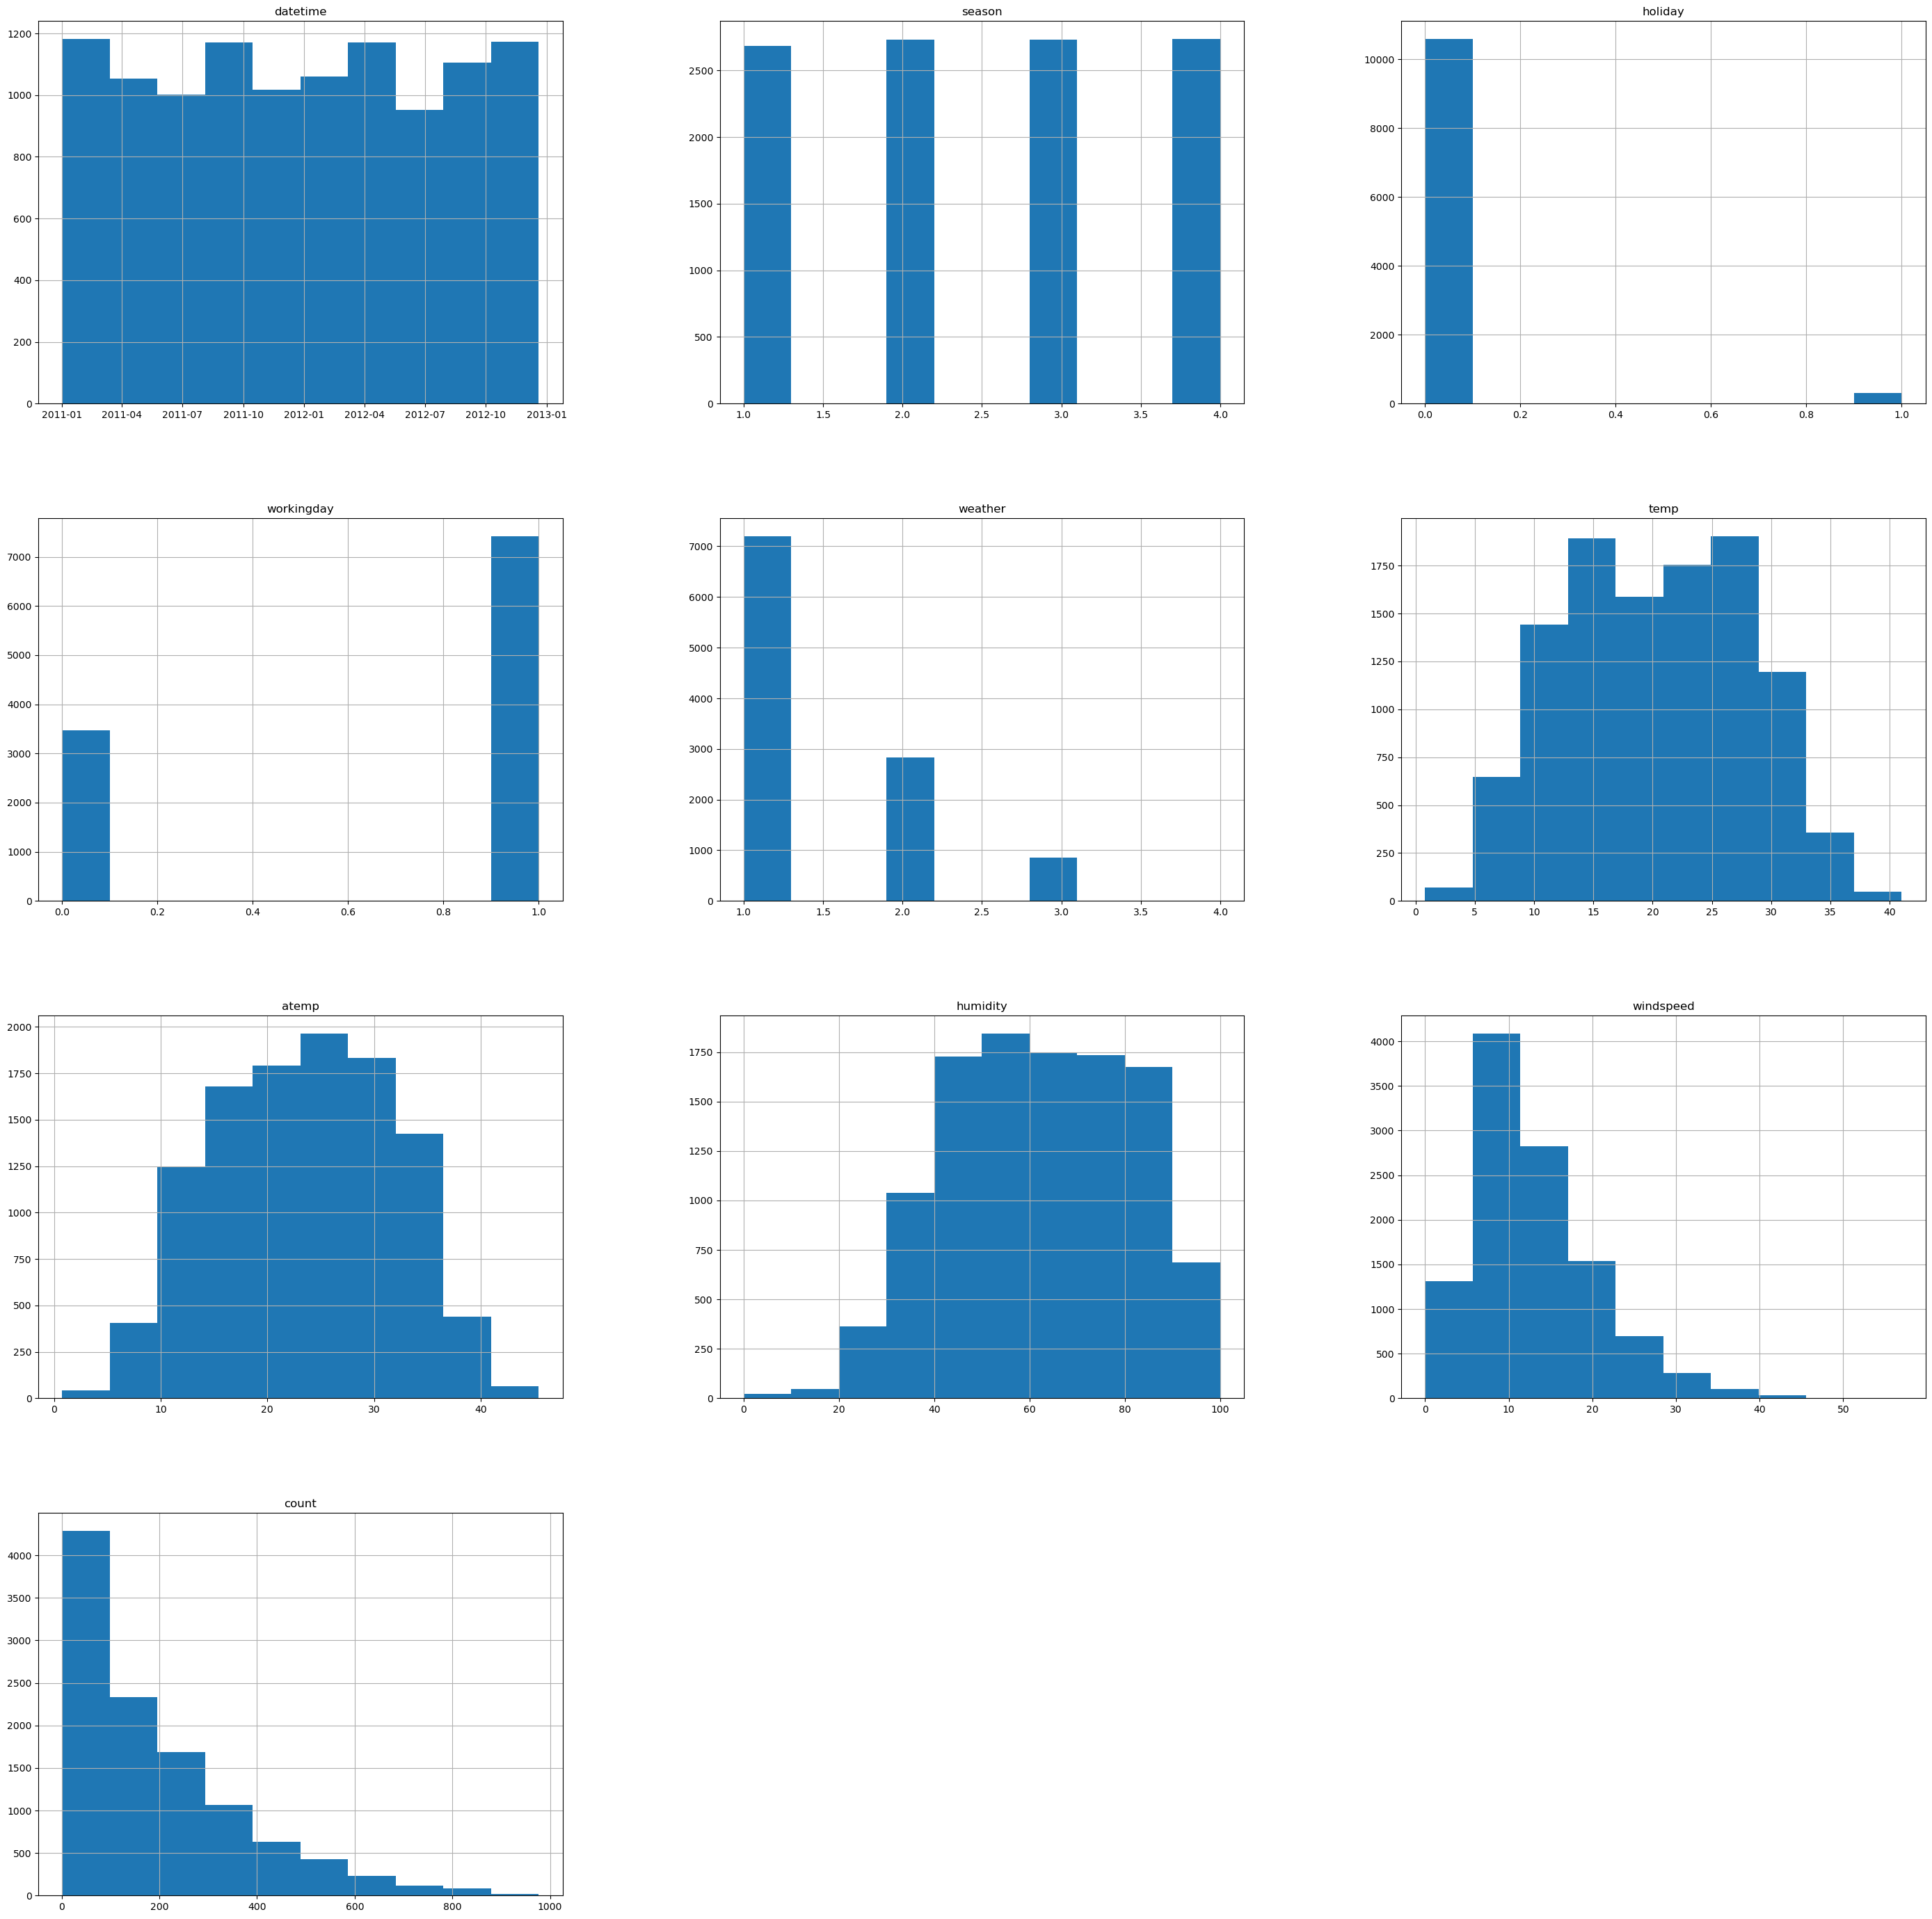

In [50]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(35,35))

In [51]:
# create a new feature
# New feature is 'hour'
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

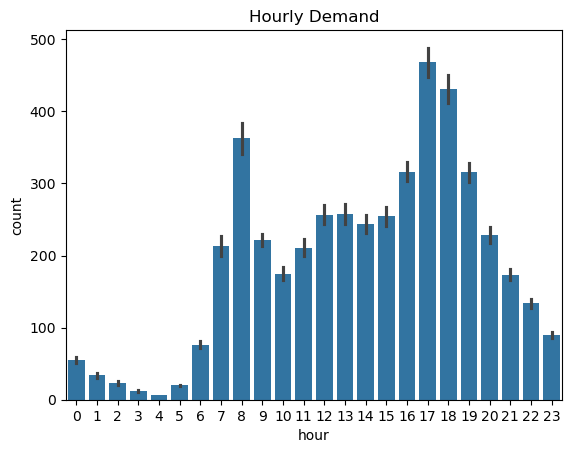

In [52]:
# Hourly demand
sns.barplot(data=train, x='hour', y='count')
plt.title("Hourly Demand")
plt.show()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [53]:
# Season and weather as category
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [54]:
# Adding Features from datetime
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day

In [55]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2011,1,1


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  hour        10886 non-null  int32         
 11  year        10886 non-null  int32         
 12  month       10886 non-null  int32         
 13  day         10886 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(3), int32(4), int64(4)
memory usage: 872.3 KB


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>]], dtype=object)

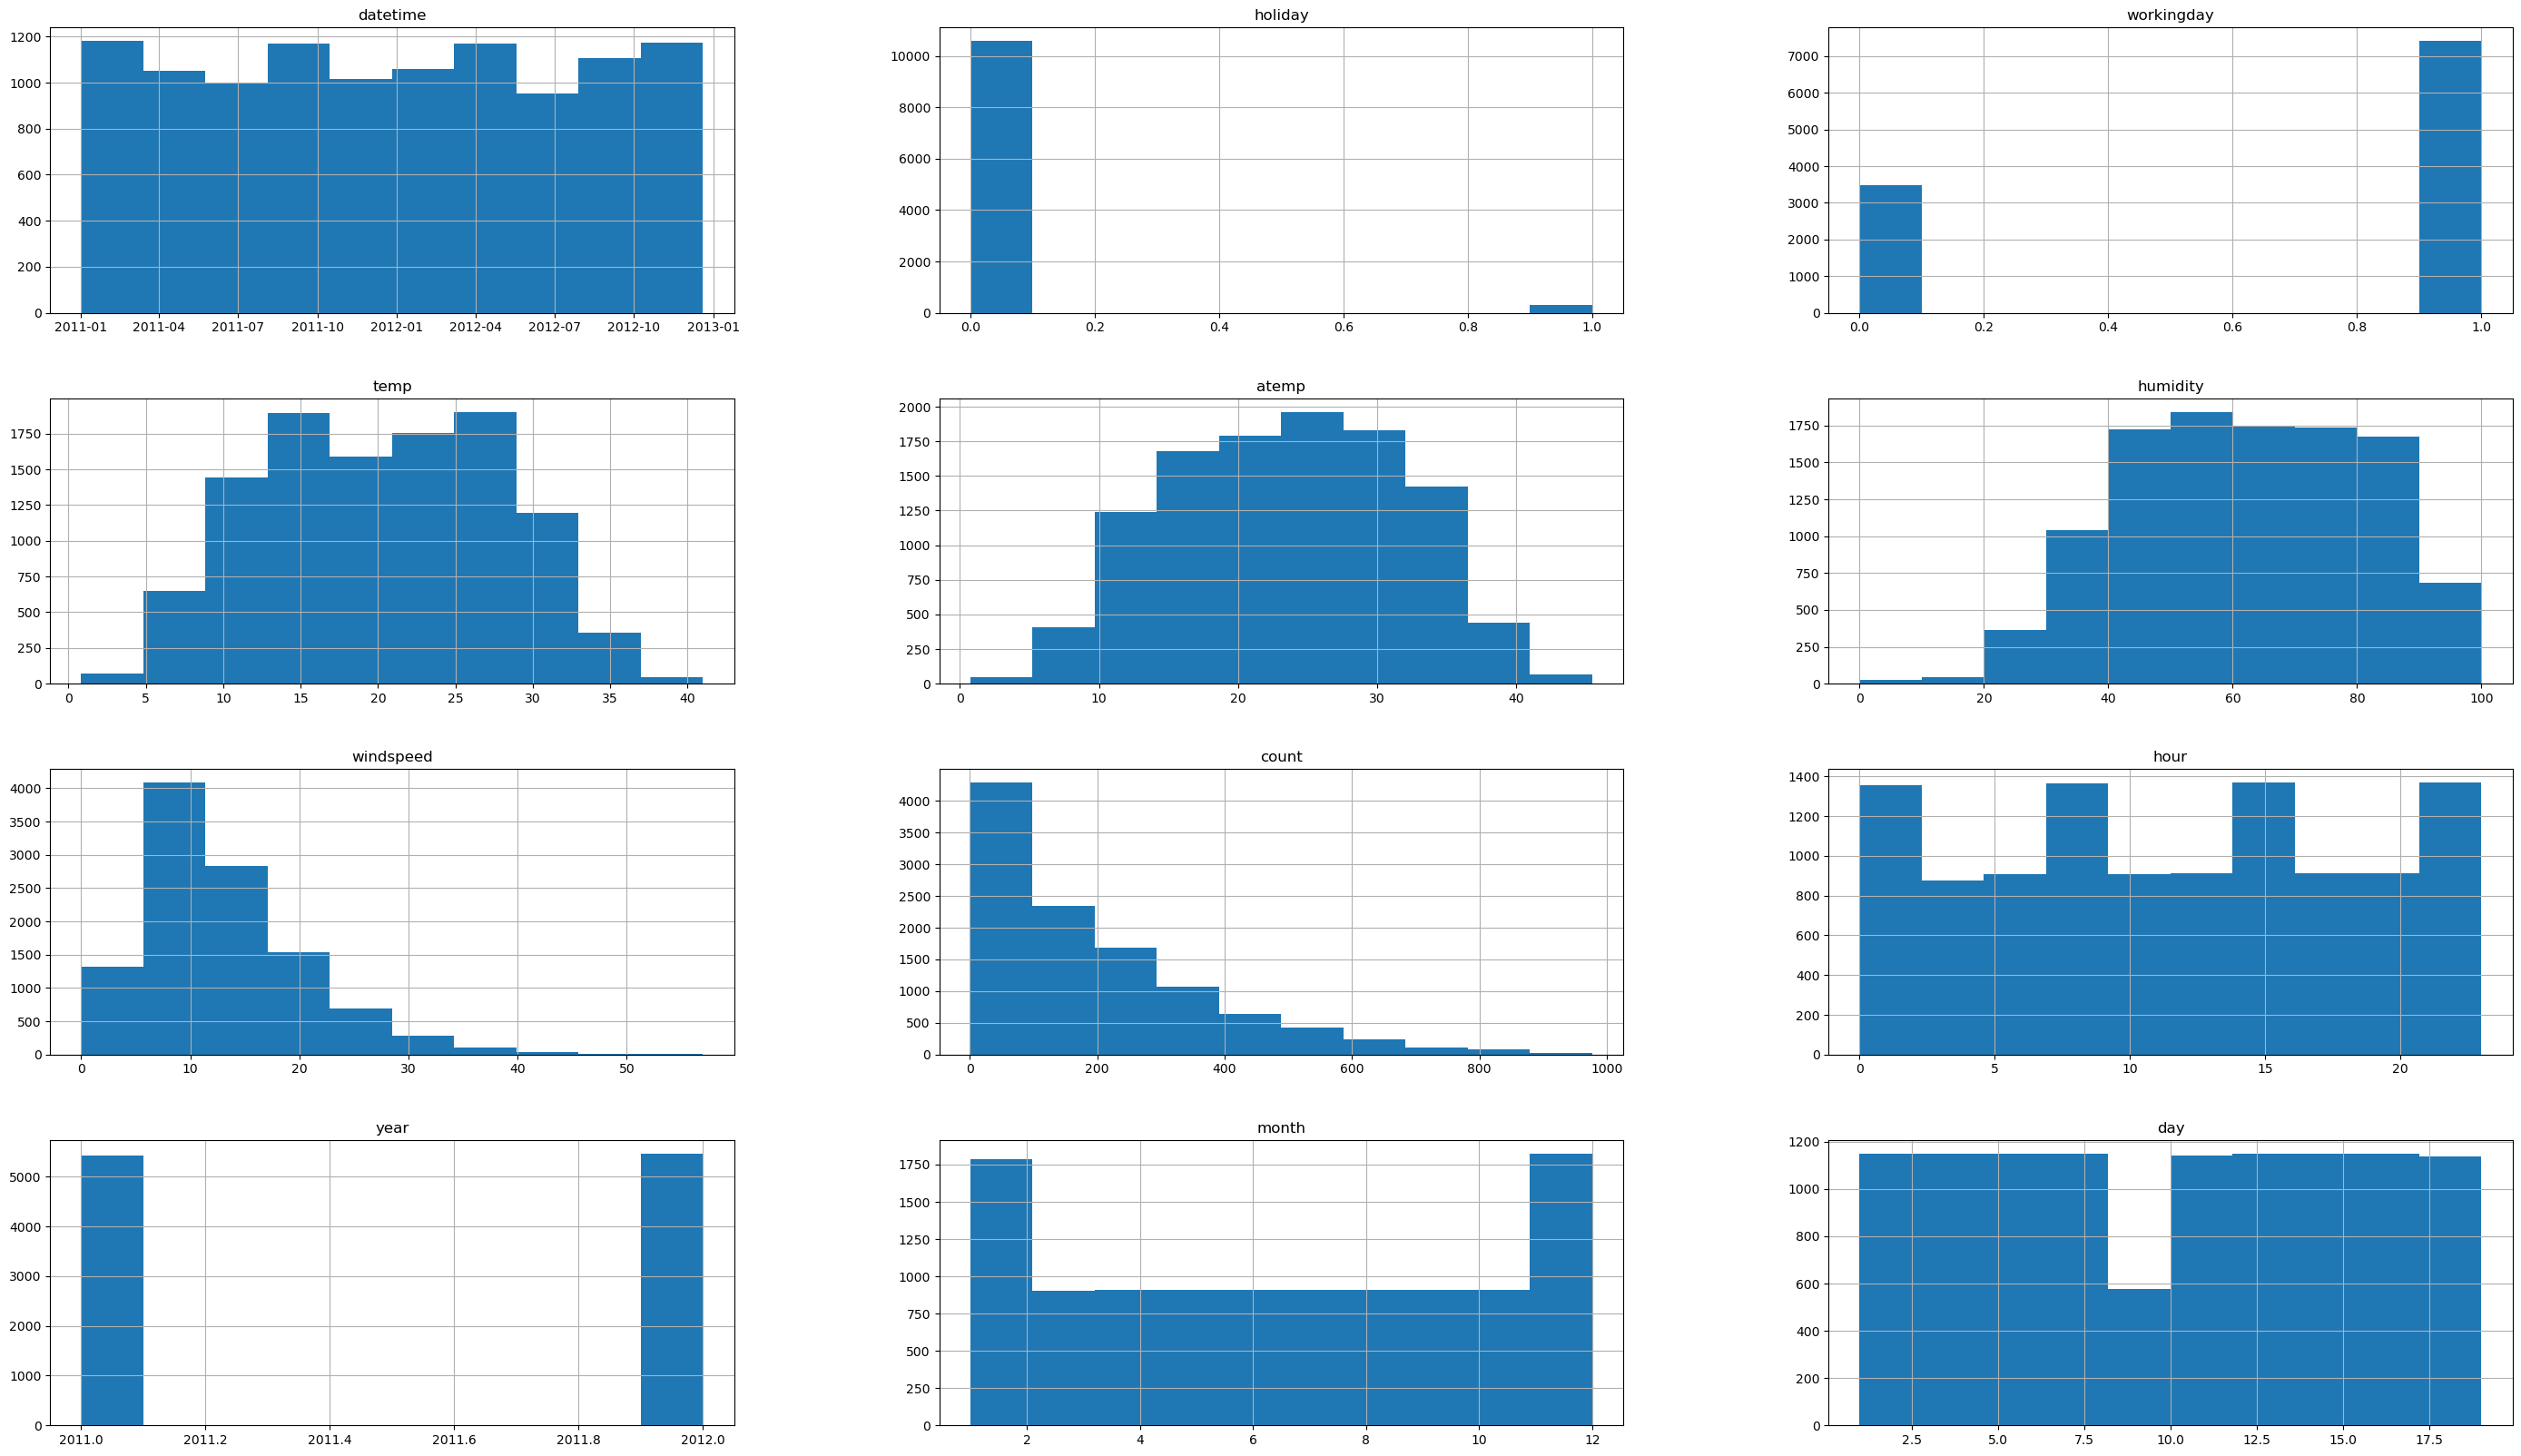

In [57]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(35,20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [58]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train,time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20250526_082248"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Memory Avail:       0.98 GB / 7.68 GB (12.7%)
Disk Space Avail:   55.50 GB / 271.14 GB (20.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout 

2025-05-26 14:02:57,692	ERROR worker.py:420 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [59]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -31.405827  root_mean_squared_error       4.717095  251.229244                0.001994           0.183688            3       True         11
1          LightGBM_BAG_L2  -31.422426  root_mean_squared_error       4.715101  251.045556                0.558906          12.949352            2       True         10
2      WeightedEnsemble_L2  -35.715014  root_mean_squared_error       4.040570  229.463735                0.009199           0.127921            2       True          8
3          CatBoost_BAG_L1  -38.295938  root_mean_squared_error       0.096051  199.856470                0.096051         199.856470            1       True          6
4   RandomForestMSE_BAG_L1  -38.479263  root_mean_squared_error       0.615797    4.990665   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'LightGBMXT_BAG_L1': -176.5612355532823,
  'LightGBM_BAG_L1': -69.39703599056851,
  'RandomForestMSE_BAG_L1': -38.47926312880057,
  'CatBoost_BAG_L1': -38.29593781723211,
  'ExtraTreesMSE_BAG_L1': -39.099478656851986,
  'WeightedEnsemble_L2': -35.715014164152805,
  'LightGBMXT_BAG_L2': -173.08

Best Performing Model: WeightedEnsemble_L3
Best Performing Score (absolute RMSE): 31.405827037190313


<Figure size 1000x600 with 0 Axes>

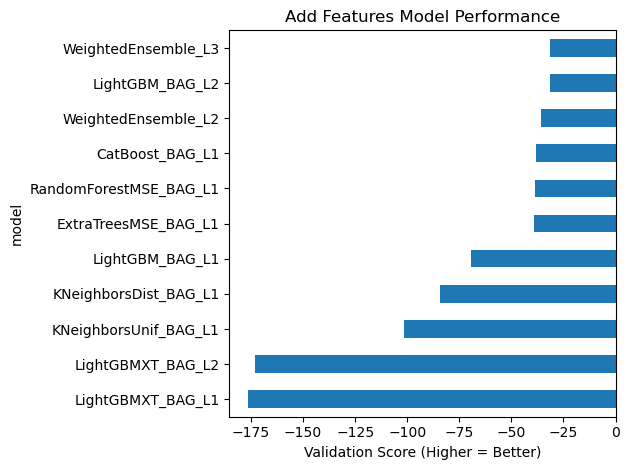

In [60]:
# Leaderboard and best score
leaderboard_add_features = predictor_new_features.leaderboard(silent=True)

# Best model is the one with the highest (least negative) score_val
best_model_row_af = leaderboard_add_features.loc[leaderboard_add_features['score_val'].idxmax()]
best_model_add_features = best_model_row_af['model']
best_score_add_features = abs(best_model_row_af['score_val'])  #absolute RMSE

print("Best Performing Model:", best_model_add_features)
print("Best Performing Score (absolute RMSE):", best_score_add_features)

plt.figure(figsize=(10, 6))
leaderboard_add_features_sorted = leaderboard_add_features.sort_values("score_val", ascending=False)
leaderboard_add_features_sorted.plot.barh(x="model", y="score_val", legend=False)
plt.xlabel("Validation Score (Higher = Better)")
plt.title("Add Features Model Performance")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [61]:
predictions_new = predictor_new_features.predict(test)
predictions_new.head()

0    17.497662
1    11.352084
2    10.852970
3    10.051885
4     8.736275
Name: count, dtype: float32

In [62]:
# Remember to set all negative values to zero
print("Count of Negative: ",(predictions_new < 0).sum())

predictions_new.loc[predictions_new < 0] = 0

print("Count of Negative after update: ",(predictions_new < 0).sum())

Count of Negative:  0
Count of Negative after update:  0


In [63]:
# Same submitting predictions
submission_new_features = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')
submission_new_features['datetime']=pd.to_datetime(submission_new_features['datetime'])
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("bike-sharing-demand/submission_new_features.csv", index=False)

submission_new_features.head()


,datetime,count
0,2011-01-20 00:00:00,17.497662
1,2011-01-20 01:00:00,11.352084
2,2011-01-20 02:00:00,10.852970
3,2011-01-20 03:00:00,10.051885
4,2011-01-20 04:00:00,8.736275


In [68]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

[WinError 2] The system cannot find the file specified: 'submission_new_features.csv'


In [73]:
import os

file_path = os.path.abspath("bike-sharing-demand/submission_new_features.csv")
!kaggle competitions submit -c bike-sharing-demand -f {file_path} -m "new features"


Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
100%|██████████| 195k/195k [00:01<00:00, 116kB/s]


In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
!kaggle competitions submissions -c bike-sharing-demand | more

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-26 08:39:18.303000  new features                              SubmissionStatus.COMPLETE  0.65487      0.65487       
submission.csv               2025-05-26 08:38:08.033000  first raw submission                      SubmissionStatus.COMPLETE  1.79315      1.79315       
submission_new_features.csv  2025-05-26 07:21:23.640000  new features                              SubmissionStatus.COMPLETE  0.66084      0.66084       
submission.csv               2025-05-26 07:06:57.633000  first raw submission                      SubmissionStatus.COMPLETE  1.62230      1.62230       
submission_new_hpo.csv       2025-05-25 15:55:35.483000  new features       

#### New Score of `0.65487`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [25]:
custom_hparams = {
    'GBM': {'extra_trees': True, 'ag_args': {'name_suffix': 'ExtraTrees'}},
    'CAT': {'iterations': 500},
    'NN_TORCH': {},
    'XGB': {},
}

predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train,time_limit=600, presets='best_quality',
    hyperparameters=custom_hparams, hyperparameter_tune_kwargs='auto')

2025-05-26 13:38:23,771	INFO timeout.py:54 -- Reached timeout of 34.35747694373131 seconds. Stopping all trials.
2025-05-26 13:38:23,885	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/Users/hp/Downloads/cd0385-project-starter-main/project/AutogluonModels/ag-20250526_075819/models/NeuralNetTorch_BAG_L2' in 0.0666s.
2025-05-26 13:38:23,933	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- b59c7f76: FileNotFoundError('Could not fetch metrics for b59c7f76: both result.json and progress.csv were not found at C:/Users/hp/Downloads/cd0385-project-starter-main/project/AutogluonModels/ag-20250526_075819/models/NeuralNetTorch_BAG_L2/b59c7f76')
- b7b953e2: FileNotFoundError('Could not fetch metrics for b7b953e2: both result.json and progress.csv were not found at C:/Users/hp/Downloads/cd0385-project-starter-main/project/AutogluonModels/ag-20250526_075819/models/NeuralNetTorch_BAG_L2/b7b953e2')
No model was trained during

In [64]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L3 -32.550938  root_mean_squared_error      26.198938  212.327715                0.006158           0.165175            3       True         11
1            WeightedEnsemble_L2 -32.930131  root_mean_squared_error      25.724504  117.379146                0.006862           0.270302            2       True          6
2              XGBoost_BAG_L2\T2 -32.977992  root_mean_squared_error      25.975461  195.348830                0.208995          17.666404            2       True         10
3              XGBoost_BAG_L2\T1 -33.036576  root_mean_squared_error      25.983786  194.496136                0.217319          16.813710            2       True          9
4   LightGBMExtraTrees_BAG_L2\T1 -33.722053  root_mean_squared_error

{'model_types': {'LightGBMExtraTrees_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBMExtraTrees_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMExtraTrees_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2\\T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2\\T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2\\T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMExtraTrees_BAG_L1\\T1': -35.56359318968477,
  'LightGBMExtraTrees_BAG_L1\\T2': -36.86906907713775,
  'CatBoost_BAG_L1\\T1': -41.68306649759998,
  'XGBoost_BAG_L1\\T1': -34.60389984795686,
  'XGBoost_BAG_L1\\T2': -34.23548249688018,
  'WeightedEnsemble_L2': -32.930130603009204,
  'LightGBMExtraTrees_BAG_L2\\T1': -33.722053

Best Performing Model: WeightedEnsemble_L3
Best Performing Score (absolute RMSE): 32.55093813025615


<Figure size 1000x600 with 0 Axes>

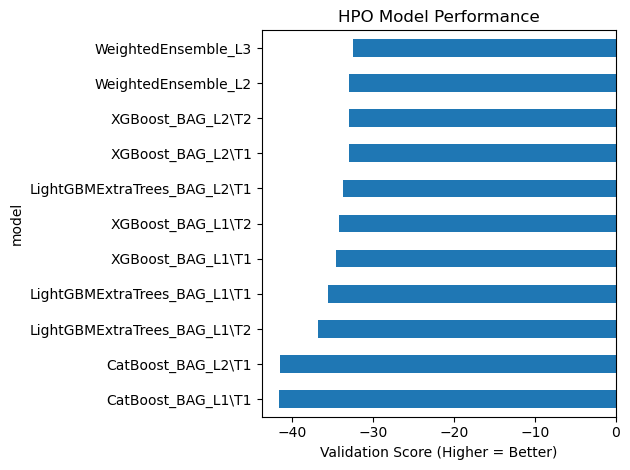

In [65]:
# Leaderboard and best score
leaderboard_hpo = predictor_new_hpo.leaderboard(silent=True)

# Best model is the one with the highest (least negative) score_val
best_model_row_hpo = leaderboard_hpo.loc[leaderboard_hpo['score_val'].idxmax()]
best_model_hpo = best_model_row_hpo['model']
best_score_hpo = abs(best_model_row_hpo['score_val'])  #absolute RMSE

print("Best Performing Model:", best_model_hpo)
print("Best Performing Score (absolute RMSE):", best_score_hpo)

plt.figure(figsize=(10, 6))
leaderboard_hpo_sorted = leaderboard_hpo.sort_values("score_val", ascending=False)
leaderboard_hpo_sorted.plot.barh(x="model", y="score_val", legend=False)
plt.xlabel("Validation Score (Higher = Better)")
plt.title("HPO Model Performance")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [66]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()
# Remember to set all negative values to zero

print("Count of Negative: ",(predictions_new_hpo < 0).sum())

predictions_new_hpo.loc[predictions_new_hpo < 0] = 0

print("Count of Negative after update: ",(predictions_new_hpo < 0).sum())

Count of Negative:  27
Count of Negative after update:  0


In [67]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')
submission_new_hpo['datetime']=pd.to_datetime(submission_new_hpo['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("bike-sharing-demand/submission_new_hpo.csv", index=False)

submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,16.946091
1,2011-01-20 01:00:00,4.467801
2,2011-01-20 02:00:00,3.107592
3,2011-01-20 03:00:00,2.925234
4,2011-01-20 04:00:00,2.930743


In [117]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

[WinError 2] The system cannot find the file specified: 'submission_new_hpo.csv'


In [77]:
file_path = os.path.abspath("bike-sharing-demand/submission_new_hpo.csv")
!kaggle competitions submit -c bike-sharing-demand -f {file_path} -m "hpo"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
100%|██████████| 194k/194k [00:01<00:00, 115kB/s]


In [80]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

'tail' is not recognized as an internal or external command,
operable program or batch file.


In [78]:
!kaggle competitions submissions -c bike-sharing-demand | more

fileName                     date                        description                               status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-26 08:40:53.327000  hpo                                       SubmissionStatus.COMPLETE  0.50058      0.50058       
submission_new_hpo.csv       2025-05-26 08:39:56.950000  new features                              SubmissionStatus.COMPLETE  0.50058      0.50058       
submission_new_features.csv  2025-05-26 08:39:18.303000  new features                              SubmissionStatus.COMPLETE  0.65487      0.65487       
submission.csv               2025-05-26 08:38:08.033000  first raw submission                      SubmissionStatus.COMPLETE  1.79315      1.79315       
submission_new_features.csv  2025-05-26 07:21:23.640000  new features       

#### New Score of `0.50058`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

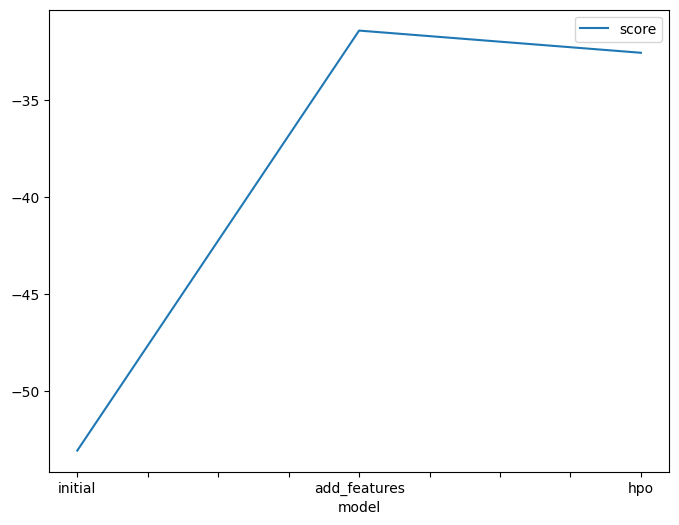

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
# Plot for negative value to show the improvement of model
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [best_model_row['score_val'], best_model_row_af['score_val'], best_model_row_hpo['score_val']]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

In [ ]:
# Best Models and Score
print('Best Model in initial: ',best_model_initial)
print('Best Score in initial: ',best_score_initial)

print('Best Model in add_features: ',best_model_add_features)
print('Best Score in add_features: ',best_score_add_features)

print('Best Model in hpo: ',best_model_hpo)
print('Best Score in hpo: ',best_score_hpo)

Best Model in initial:  WeightedEnsemble_L3
Best Score in initial:  53.073323462063605
Best Model in add_features:  WeightedEnsemble_L3
Best Score in add_features:  31.405827037190313
Best Model in hpo:  WeightedEnsemble_L3
Best Score in hpo:  32.55093813025615


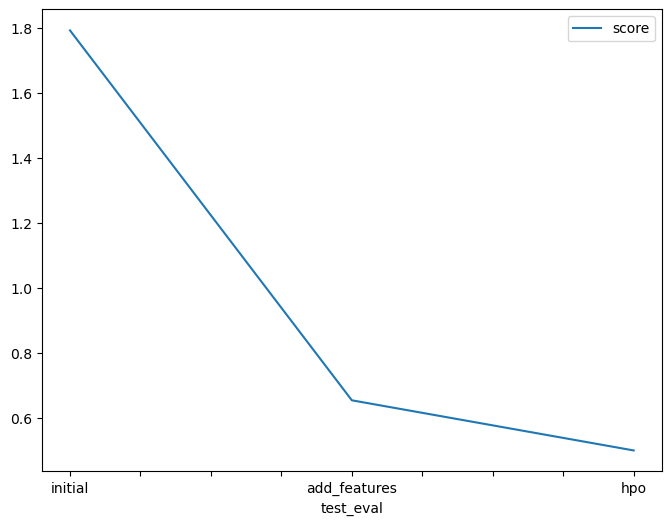

In [79]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79315, 0.65487, 0.50058]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')     

### Hyperparameter table

In [80]:
# The 3 hyperparameters we tuned with the kaggle score as the result

pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "multimodal"],
    "hpo2": ["default", "default", "auto"],
    "hpo3": ["default", "default", "auto"],
    "score": [1.79315, 0.65487, 0.50058]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.79315
1,add_features,default,default,default,0.65487
2,hpo,multimodal,auto,auto,0.50058
